In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import glob
import cv2
import os
current_dir = os.getcwd()
# Load data
def load_data(img_dir):
    data = []
    labels = []
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
    for label in classes:
        path = os.path.join(current_dir, img_dir, label, "*.jpg")
        for img_path in glob.glob(path):
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (28, 28))  # resize image to 28x28
            data.append(image)
            labels.append(classes.index(label))
        print(classes.index(label))
    data = np.array(data)/255.0  # normalize the data to [0, 1] range
    labels = np.array(labels)
    return data, labels

In [11]:
img_dir = "train"  # assuming the dataset is stored in a directory named 'train'
data, labels = load_data(img_dir)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [12]:
# One-hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [13]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Make sure images have shape (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [14]:
# Build the CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(29, activation='softmax')  # 29 classes for A-Z, Del, Nothing, Space
])

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
2175/2175 [==============================] - 37s 17ms/step - loss: 0.0920 - accuracy: 0.9697 - val_loss: 0.0602 - val_accuracy: 0.9816
Epoch 2/2
2175/2175 [==============================] - 37s 17ms/step - loss: 0.0655 - accuracy: 0.9782 - val_loss: 0.0466 - val_accuracy: 0.9835


In [21]:
model.save('ASL_Model_2epochs.h5')

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

544/544 [==============================] - 3s 5ms/step - loss: 0.0466 - accuracy: 0.9835


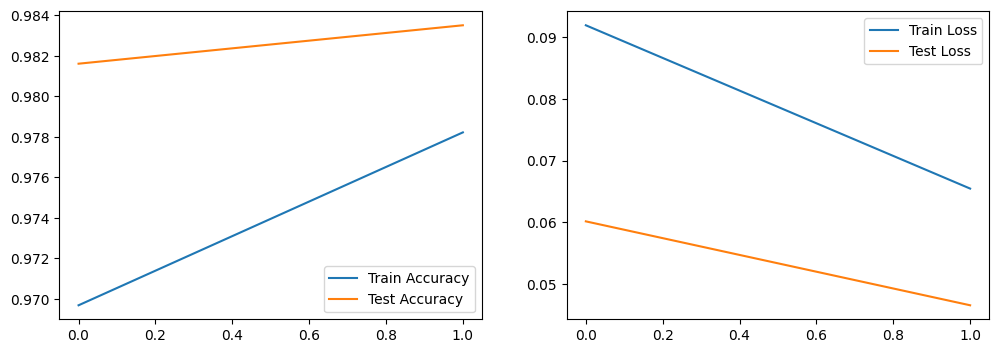

In [23]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded ground truth labels to class labels


544/544 [==============================] - 3s 5ms/step


In [27]:
# Assuming you have this list of class names from earlier in your code
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

cm = confusion_matrix(y_true_classes, y_pred_classes)

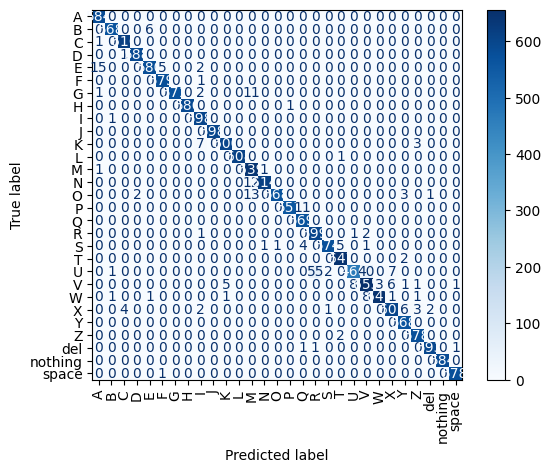

In [28]:
# Display the confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')  # Setting values_format to 'd' for integer formatting
plt.show()